In [9]:
import os

In [3]:
os.getcwd()

'C:\\Users\\matza'

In [11]:
import pandas as pd
import zipfile

with zipfile.ZipFile('15158357.zip') as z:
    print(z.namelist())

['data/PFE.csv', 'data/HST.csv', 'data/CPRT.csv', 'data/SJM.csv', 'data/GIS.csv']


In [13]:
with zipfile.ZipFile('15158357.zip') as z:
    with z.open('data/PFE.csv') as f:
        df_PFE = pd.read_csv(f)
    with z.open('data/HST.csv') as f:
        df_HST = pd.read_csv(f)
    with z.open('data/CPRT.csv') as f:
        df_CPRT = pd.read_csv(f)
    with z.open('data/SJM.csv') as f:
        df_SJM = pd.read_csv(f)
    with z.open('data/GIS.csv') as f:
        df_GIS = pd.read_csv(f)

In [23]:
import datetime
from datetime import datetime
df_PFE['Date'] = pd.to_datetime(df_PFE['Date'])
df_HST['Date'] = pd.to_datetime(df_HST['Date'])
df_CPRT['Date'] = pd.to_datetime(df_CPRT['Date'])
df_SJM['Date'] = pd.to_datetime(df_SJM['Date'])
df_GIS['Date'] = pd.to_datetime(df_GIS['Date'])

In [28]:
df_PFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1510 non-null   datetime64[ns]
 1   Open          1510 non-null   float64       
 2   High          1510 non-null   float64       
 3   Low           1510 non-null   float64       
 4   Close         1510 non-null   float64       
 5   Volume        1510 non-null   int64         
 6   Dividends     1510 non-null   float64       
 7   Stock Splits  1510 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 94.5 KB


1.1

In [56]:
sum(df_PFE['Open']!=df_PFE['Close'])

1490

In [58]:
sum(df_HST['Open']!=df_HST['Close'])

1483

In [60]:
sum(df_CPRT['Open']!=df_CPRT['Close'])

1505

In [68]:
sum(df_SJM['Open']!=df_SJM['Close'])

1506

In [72]:
sum(df_GIS['Open']!=df_GIS['Close'])

1500

There isn't any company that has no difference between the Opne and the Close columns

1.2

In [86]:
df_PFE.Close.min(), df_PFE.Close.max()

(21.37, 53.48)

In [98]:
df_CPRT.Close.min(), df_CPRT.Close.max()

(6.957, 39.775)

In [90]:
df_HST.Close.min(), df_HST.Close.max()

(8.07, 18.948)

In [92]:
df_SJM.Close.min(), df_SJM.Close.max()

(77.241, 149.526)

In [94]:
df_GIS.Close.min(), df_GIS.Close.max()

(29.988, 82.008)

1.3

In [117]:
import numpy as np
def averageLog(df):
    closeLog = np.log10(df['Close'])
    min = closeLog.min()
    max = closeLog.max()
    mean = closeLog.mean()
    median = closeLog.median()
    
    print(f"min: {min}, max: {max}, mean: {mean}, median: {median}")

In [119]:
averageLog(df_PFE)

min: 1.3298045221640695, max: 1.7281913985899466, mean: 1.4941311683555532, median: 1.4808258593292294


In [121]:
averageLog(df_CPRT)

min: 0.8424220033576498, max: 1.5996101883186191, mean: 1.2731464104267232, median: 1.31318149045019


In [123]:
averageLog(df_HST)

min: 0.9068735347220704, max: 1.277563376055919, mean: 1.1606135679404694, median: 1.1761925707972238


In [127]:
averageLog(df_SJM)

min: 1.8878478877338536, max: 2.174716715568543, mean: 2.010543182921057, median: 2.002455494600568


In [129]:
averageLog(df_GIS)

min: 1.4769475021740748, max: 1.9138562205103689, mean: 1.686027935228122, median: 1.6670745295482243


1.4

In [154]:
def highestLossGain(df):
    df.set_index("Date")
    df["Perc_diff"] = (df["Close"] - df["Open"])/df["Open"]
    idxmax = abs(df["Perc_diff"]).idxmax()

    return df.loc[idxmax]["Perc_diff"]

In [156]:
highestLossGain(df_PFE)

-0.06462976276060395

In [158]:
highestLossGain(df_CPRT)

-0.1585720680393912

In [160]:
highestLossGain(df_HST)

0.12875482986414052

In [162]:
highestLossGain(df_SJM)

0.12111748818365953

In [164]:
highestLossGain(df_GIS)

0.10583255954566075

1.5

In [182]:
def averageWeekly(df):
    df.set_index("Date")
    series = df['Close'].resample('W-MON')

    return series

In [ ]:
averageWeekly(df_PFE)

1.6

In [191]:
def highestReturn(df):
    df.set_index("Date")
    df["Return"] = df['Close'].pct_change()
    idxmax = df["Perc_diff"].idxmax()

    return df.loc[idxmax]["Return"]

In [193]:
highestReturn(df_PFE)

0.06720535210043876

In [195]:
highestReturn(df_CPRT)

0.17352841102415795

In [197]:
highestReturn(df_HST)

0.11171126933464248

In [199]:
highestReturn(df_SJM)

0.04648231308595285

In [201]:
highestReturn(df_GIS)

0.11782938967955991

The firm with the highest return in the whole period is the CPRT firm

1.7

In [235]:
def volumeThresh(df):
    for i in df.index:
        if (df.loc[i]["Volume"] <= df["Volume"].quantile(.25)):
            df.loc[i]["Volume_class"] = "Low"
        elif ( (df.loc[i]["Volume"]>df["Volume"].quantile(.25)) & (df.loc[i]["Volume"]<=df["Volume"].quantile(.5)) ):
            df.loc[i]["Volume_class"] = "Medium"
        elif ((df.loc[i]["Volume"]>df["Volume"].quantile(.5))&(df.loc[i]["Volume"]<=df["Volume"].quantile(.75))):
            df.loc[i]["Volume_class"] = "High"
        elif (df.loc[i]["Volume"]>df["Volume"].quantile(.25)):
            df.loc[i]["Volume_class"] = "Very High"

In [ ]:
volumeThresh(df_PFE)

1.8

<Axes: >

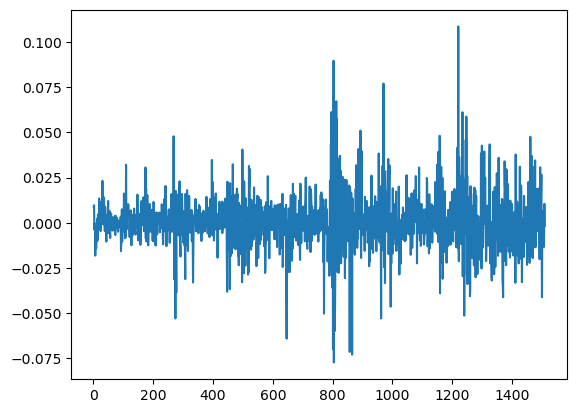

In [242]:
import matplotlib.pyplot as plt
df_PFE["Return"].plot()